In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [71]:
client = MongoClient('localhost', 27017)
db = client.TFE
collection = db.liar_liar

In [72]:
data = [{'type' : res['type'], 'word_count' : res['word_count']} for res in collection.find()]

In [73]:
data = pd.DataFrame(data)

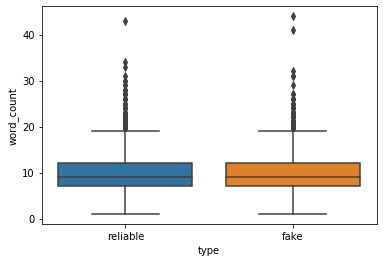

In [77]:
sns.boxplot(x='type', y='word_count', data=data[data['word_count'] < 50])
#sns.boxplot(x='type', y='word_count', data=data)

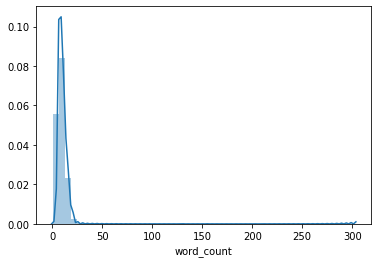

In [78]:
sns.distplot(data['word_count'])

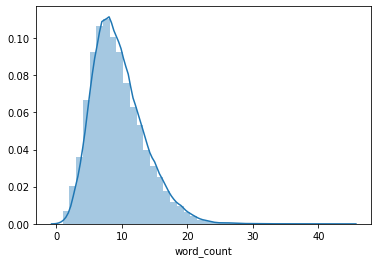

In [79]:
sns.distplot(data[data['word_count'] < 50]['word_count'], bins = len(data['word_count'].unique()))

In [30]:
np.sort(data['word_count'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  31,  32,  33,  34,  41,  43,  44, 155, 205, 302])

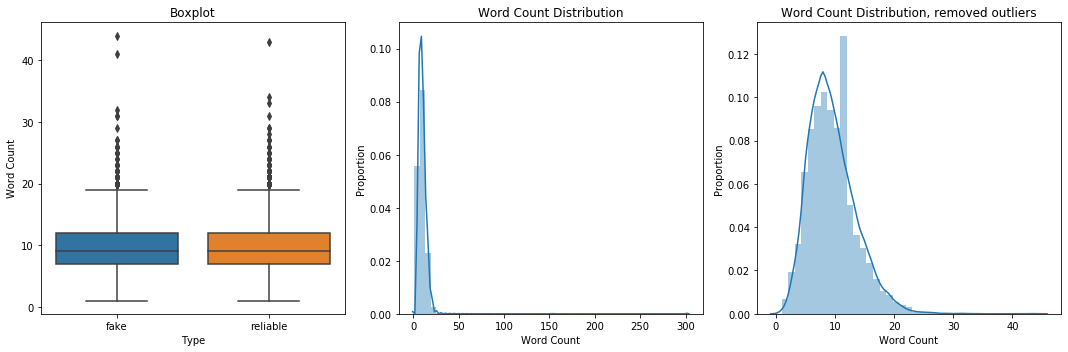

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
fig.subplots_adjust(hspace=1)
sns.boxplot(x='type', y='word_count', data=data[data['word_count'] < 150], ax=axes[0])
axes[0].set(title="Boxplot", xlabel='Type', ylabel='Word Count')
sns.distplot(data['word_count'], ax=axes[1])
axes[1].set(title="Word Count Distribution", xlabel='Word Count', ylabel='Proportion')
sns.distplot(data[data['word_count'] < 50]['word_count'], bins = len(data['word_count'].unique()), ax = axes[2])
axes[2].set(title="Word Count Distribution, removed outliers", xlabel='Word Count', ylabel='Proportion')
fig.tight_layout()
plt.savefig('out/liar_liar_summary.pdf')